## Resources

- Academic Paper: "Payday Anomaly" by Aixin Ma and William R. Pratt (Meinders School of Business, Oklahoma City University) [Payday Anomaly](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3257064)

* Sample Python Notebook:
  * https://colab.research.google.com/drive/1ZMOSFWxPdGcpYKWF35hv9Pcq8Copn4tt?usp=sharing
* Sample Google Sheet:
  * https://docs.google.com/spreadsheets/d/1dCNIkVQjBfz_ZFpLDyqyw0aZr_pEuEZNO6W3JjB_-io/edit?usp=sharing
  

Data:

* https://www.bls.gov/opub/btn/volume-3/how-frequently-do-private-businesses-pay-workers.htm
* https://www.bls.gov/ces/publications/length-pay-period.htm


## Project Overview
In this project, I will investigate and visualize the "Payday Anomaly" - a documented market phenomenon where stock returns show distinct patterns around common payroll dates. I will extend previous research by examining how this pattern has evolved, particularly comparing pre-COVID patterns with post-COVID changes that may reflect shifts in the economy and payment structures.

## Learning Objectives
- Implement financial data processing techniques in Python
- Create clear, informative visualizations of calendar-based market anomalies
- Develop and test hypotheses about market inefficiencies
- Analyze how economic shifts may affect established market patterns

## Background
Research by Aixin Ma and William R. Pratt has documented that U.S. stock market returns exhibit anomalous patterns around the dates when most Americans receive their paychecks. While previous studies focused on turn-of-the-month effects, Ma and Pratt's research reveals significant abnormal returns on the 16th day of the month, corresponding to mid-month paychecks from semi-monthly pay schedules. Their analysis of S&P 500 data from 1950-2018 showed that the 16th day was the 3rd best performing day of the month overall, with only the 1st and 2nd days showing higher returns. This project challenges you to visualize and analyze this payday anomaly phenomenon using actual market data.

## Project Requirements

### Data Collection
- Download historical price data for QQQ from finance.yahoo.com
  - Option 1: Create a free Yahoo Finance account and download manually
  - Option 2: Use Python with libraries like yfinance to retrieve the data programmatically
- Ensure your data includes a sufficient timeframe to analyze both pre-COVID and post-COVID periods

### Data Analysis Requirements
Students must perform the following analysis steps:

1. **Data Collection and Preparation**
   - Download historical price data for QQQ from finance.yahoo.com
   - Calculate daily returns
   - Engineer the following features from the date:
     - Day of month (1-31)
     - Day of week (Monday-Friday)
     - Identify paydays at month-end and mid-month
     - Create a T-X index relative to paydays (T-2, T-1, T+0, T+1, T+2)

2. **Analysis Periods**
   - Split the analysis into two time periods:
     - Pre-COVID (ending February 2020)
     - Post-COVID (starting March 2020)

3. **Visualization Tools**
   - Students may use Python, Tableau, or Excel for their visualizations
   - Pre-processing can be done in Python with visualization in Tableau if preferred

### Visualization Requirements
Students must create the following visualizations:

1. **Average returns by day of month**
   - Create a bar chart comparing pre-COVID and post-COVID returns for each day of the month (1-31)
   - Both time periods should be displayed on the same chart using grouped bars
   - Highlight days e.g. 1 or 16 for clear comparison

2. **Average returns by T-X index relative to payday**
   - Create a bar chart showing returns for T-2, T-1, T+0, T+1, and T+2 relative to paydays
   - Display both pre-COVID and post-COVID periods on the same chart
   - Clearly highlight the shift in pattern between the two periods

3. **Average returns by day of week**
   - Create a bar chart showing returns for each day of the week (Monday-Friday)
   - Display both pre-COVID and post-COVID periods on the same chart
   - Emphasize any significant changes in the day-of-week effect between periods

4. **2 Additional Visualizations**
  - Create two additional visualizations to support your story.

### Deliverables
- Fully documented Python notebook containing:
  - All required code for data collection and preparation
  - The six required visualizations with proper labeling and formatting
  - Clear markdown explanations of findings and interpretations
- A one-page written analysis addressing:
  - How your findings compare to Ma and Pratt's original research
  - What changed in the payday anomaly pattern post-COVID
  - Interpretation of why these changes occurred (e.g., gig economy hypothesis)
  - Implications for market efficiency theories

*This project combines financial data analysis with advanced visualization techniques, allowing you to examine the relationship between semi-monthly pay schedules and market performance. As Ma and Pratt's research shows, even as companies transition from semi-monthly to bi-weekly pay schedules, understanding these calendar-based patterns remains relevant for financial analysis.*

#0. Paper & Data:
* https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3257064


In [ ]:
# Get data from yahoo finance
import yfinance as yf
qqq_prices = yf.download('QQQ')
qqq_prices.columns = qqq_prices.columns.get_level_values(0)
qqq_prices

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
1999-03-10,43.282822,43.362288,42.620600,43.335799,5232000
1999-03-11,43.494755,43.852355,42.647110,43.600710,9688600
1999-03-12,42.435200,43.362311,42.090844,43.335822,8743600
1999-03-15,43.653687,43.706664,42.302753,42.753064,6369000
1999-03-16,44.024532,44.209955,43.362310,43.839110,4905800
...,...,...,...,...,...
2025-04-04,422.670013,440.369995,422.670013,438.140015,117088400
2025-04-07,423.690002,443.140015,402.390015,408.660004,161557000
2025-04-08,416.059998,443.140015,409.790009,438.160004,101248100


In [ ]:
qqq_prices['DAY']=qqq_prices.index.map(lambda x: x.day)
qqq_prices['RETURNS']=qqq_prices['Close'].pct_change()
qqq_prices

Price,Close,High,Low,Open,Volume,DAY,RETURNS
Date,,,,,,,
1999-03-10,43.282822,43.362288,42.620600,43.335799,5232000,10,NaN
1999-03-11,43.494755,43.852355,42.647110,43.600710,9688600,11,0.004896
1999-03-12,42.435200,43.362311,42.090844,43.335822,8743600,12,-0.024361
1999-03-15,43.653687,43.706664,42.302753,42.753064,6369000,15,0.028714
1999-03-16,44.024532,44.209955,43.362310,43.839110,4905800,16,0.008495
...,...,...,...,...,...,...,...
2025-04-04,422.670013,440.369995,422.670013,438.140015,117088400,4,-0.062109
2025-04-07,423.690002,443.140015,402.390015,408.660004,161557000,7,0.002413
2025-04-08,416.059998,443.140015,409.790009,438.160004,101248100,8,-0.018008


Text(0.5, 1.0, 'Mean Returns by Calendar Day')

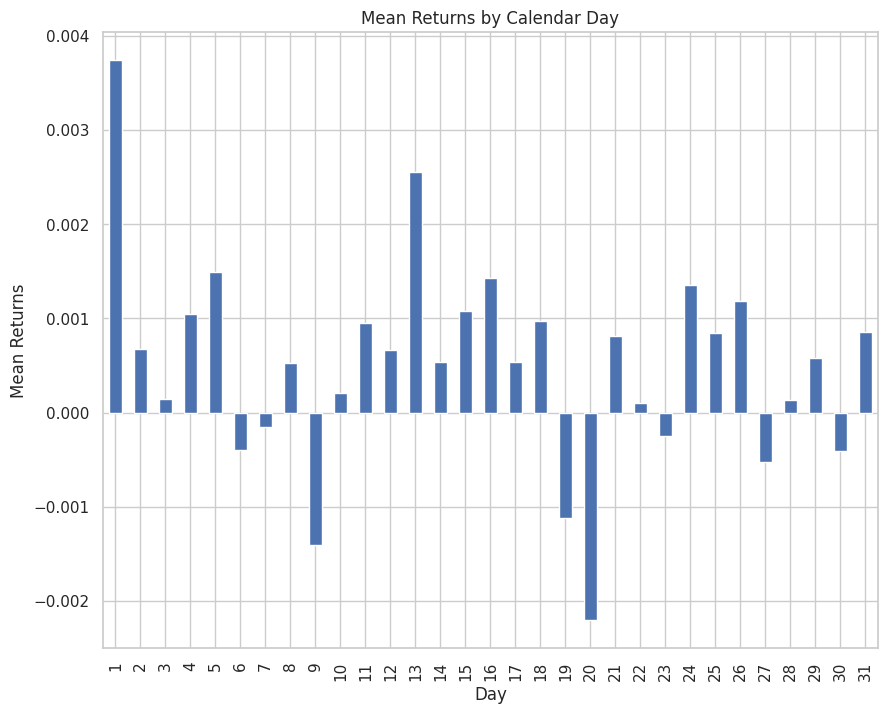

In [ ]:
ax = qqq_prices.groupby('DAY')['RETURNS'].mean().plot(kind='bar')
# fig size
fig = ax.get_figure()
fig.set_size_inches(10, 8)
# Label x-axis
ax.set_xlabel("Day")
# Label y-axis
ax.set_ylabel("Mean Returns")
ax.set_title("Mean Returns by Calendar Day")

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download QQQ data (adjust dates as needed)
qqq_prices = yf.download('QQQ', start='1999-03-10', end='2025-04-10')
qqq_prices.columns = qqq_prices.columns.get_level_values(0)
qqq_prices.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


## Feature Engineering

In [ ]:
# Calculate daily returns based on Close price
qqq_prices['RETURNS'] = qqq_prices['Close'].pct_change()

# Create additional date-based features:
# - Day of month and weekday.
qqq_prices['DAY'] = qqq_prices['Date'].dt.day
qqq_prices['WEEKDAY'] = qqq_prices['Date'].dt.day_name()

# Split data into Pre-COVID and Post-COVID periods (using March 1, 2020 as the cutoff)
qqq_prices['Period'] = np.where(qqq_prices['Date'] < '2020-03-01', 'Pre-COVID', 'Post-COVID')

# Identify paydays.
# We consider the 16th of the month or the month-end as payday.
qqq_prices['MonthEnd'] = qqq_prices.groupby(qqq_prices['Date'].dt.to_period('M'))['Date'].transform('max')
qqq_prices['Is_16th'] = qqq_prices['DAY'] == 16
qqq_prices['Is_MonthEnd'] = qqq_prices['Date'] == qqq_prices['MonthEnd']
qqq_prices['Is_Payday'] = qqq_prices['Is_16th'] | qqq_prices['Is_MonthEnd']

# Create T-X index (T-2 to T+2) relative to paydays.
qqq_prices['T_Index'] = np.nan
payday_dates = qqq_prices[qqq_prices['Is_Payday']]['Date'].reset_index(drop=True)

# For each identified payday, assign business day offsets (T-2, T-1, T+0, T+1, T+2)
for payday in payday_dates:
    for i in range(-2, 3):  # from -2 to +2
        t_date = payday + pd.tseries.offsets.BDay(i)
        if t_date in qqq_prices['Date'].values:  # Check if the date exists in our dataset
            qqq_prices.loc[qqq_prices['Date'] == t_date, 'T_Index'] = f"T{i:+d}"


<ipython-input-53-fdc469d2f656>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'T-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  qqq_prices.loc[qqq_prices['Date'] == t_date, 'T_Index'] = f"T{i:+d}"


#1. Data Visualization

## Average Returns by Calendar Day (Pre vs. Post-COVID)

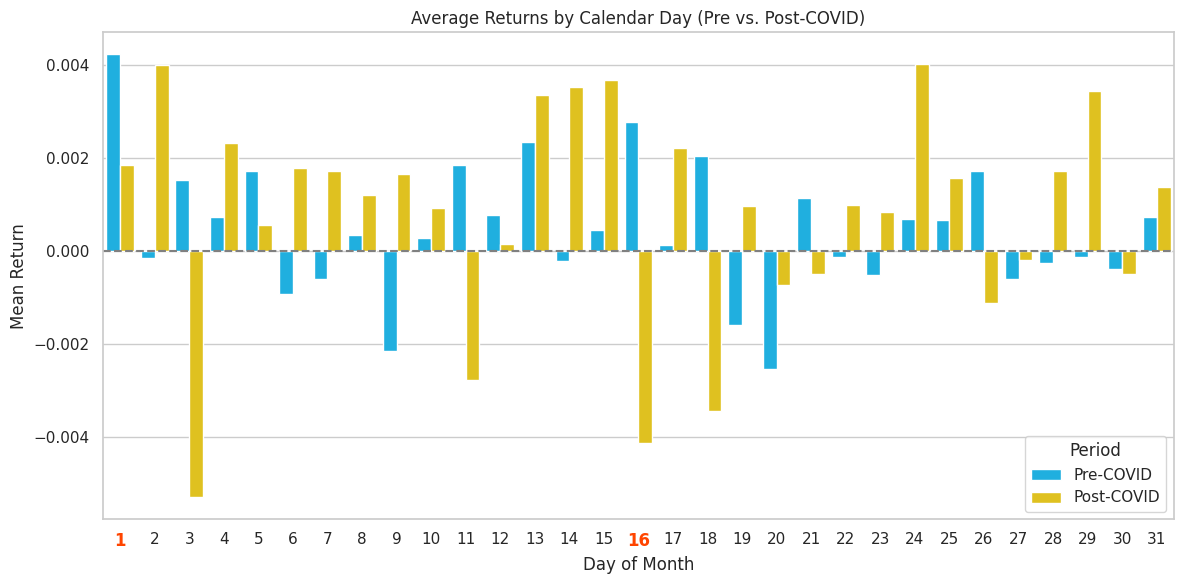

In [ ]:
# 1. Average Returns by Calendar Day (Pre vs. Post-COVID) with Brighter Bar Colors
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Define a custom palette with bright colors
palette = {"Pre-COVID": "deepskyblue", "Post-COVID": "gold"}

ax = sns.barplot(data=qqq_prices, x='DAY', y='RETURNS', hue='Period', errorbar=None, palette=palette)
plt.title("Average Returns by Calendar Day (Pre vs. Post-COVID)")
plt.xlabel("Day of Month")
plt.ylabel("Mean Return")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Period")

# Highlight tick labels for day 1 and day 16 using a brighter color ("orangered") and increased font size.
for tick in ax.get_xticklabels():
    if tick.get_text() in ['1', '16']:
        tick.set_color('orangered')
        tick.set_fontweight('bold')
        tick.set_fontsize(12)

plt.tight_layout()
plt.show()


###Findings & Interpretation:

Purpose: This chart compares the average daily returns based on calendar days across the entire month, split into Pre‑COVID and Post‑COVID periods.

###Key Insights:

Specific days such as day 1 and day 16 are highlighted to draw attention to known anomalies (e.g., the payday effect on the 16th).

Differences between the two periods on these key days may suggest that the anomaly has shifted over time.

###Interpretation:

If, for instance, day 16 shows significantly different average returns in the Post‑COVID era, it may imply that changes in payment schedules or liquidity patterns are influencing market behavior on that day.

###Takeaway:
Calendar-based anomalies are visible in the data, and highlighting key days helps us focus on potential shifts that are critical for understanding market inefficiencies.

## Business Days (T-2 to T+2) based on mid/end of month



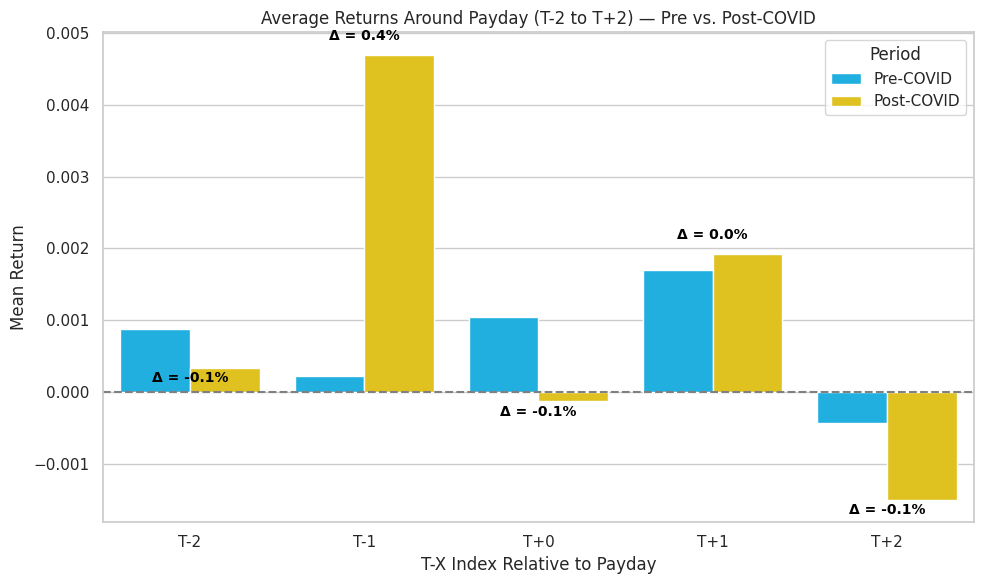

In [ ]:
# 2. Average Returns by T-X Index Relative to Payday (Pre vs. Post-COVID)
plt.figure(figsize=(10, 6))

# Filter to include only rows with valid T_Index values.
t_data = qqq_prices[qqq_prices['T_Index'].notnull()]

# Define a custom bright palette
palette = {"Pre-COVID": "deepskyblue", "Post-COVID": "gold"}

ax = sns.barplot(data=t_data,
                 x='T_Index',
                 y='RETURNS',
                 hue='Period',
                 order=['T-2', 'T-1', 'T+0', 'T+1', 'T+2'],
                 errorbar=None,
                 palette=palette)
plt.title("Average Returns Around Payday (T-2 to T+2) — Pre vs. Post-COVID")
plt.xlabel("T-X Index Relative to Payday")
plt.ylabel("Mean Return")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Period")

# Compute a pivot table of the average returns for annotation
avg_tindex = t_data.groupby(['T_Index', 'Period'])['RETURNS'].mean().unstack()
# Ensure the T-index order is correct
order = ['T-2', 'T-1', 'T+0', 'T+1', 'T+2']
avg_tindex = avg_tindex.reindex(order)

# Annotate the shift between Pre-COVID and Post-COVID for each T-index:
x_coords = np.arange(len(order))
for i, t_index in enumerate(order):
    # Extract average returns for Pre-COVID and Post-COVID
    pre_val = avg_tindex.loc[t_index, 'Pre-COVID']
    post_val = avg_tindex.loc[t_index, 'Post-COVID']
    diff = post_val - pre_val  # Difference between periods
    # Format the difference as a percentage change
    label_text = f"Δ = {diff*100:.1f}%"
    # Determine vertical position: slightly above the higher bar for a positive diff, or below for a negative diff.
    if diff >= 0:
        y = max(pre_val, post_val) + 0.0002
    else:
        y = min(pre_val, post_val) - 0.0002
    ax.text(x_coords[i], y, label_text, ha="center", fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


###Purpose:
This chart presents how average returns vary on days around the identified payday event (from two business days before to two after).

###Key Insights:

The grouped bar chart clearly shows the difference in performance at each T‑index between Pre‑COVID and Post‑COVID periods.

Annotations (if added) or visual differences in the bar heights help us see if the anomaly is more pronounced during one period compared to the other.

###Interpretation:

For example, if T+0—the actual payday—has higher volatility or significantly different average returns in the Post‑COVID period compared to Pre‑COVID, it may indicate changes in liquidity, automatic investment behavior, or market sentiment.

###Takeaway:
This visualization suggests that the market’s reaction around payday events may have shifted after COVID, emphasizing the need for investors to account for these differences in their strategies.



## Weekdays (To find weekly or biweekly payroll effects)


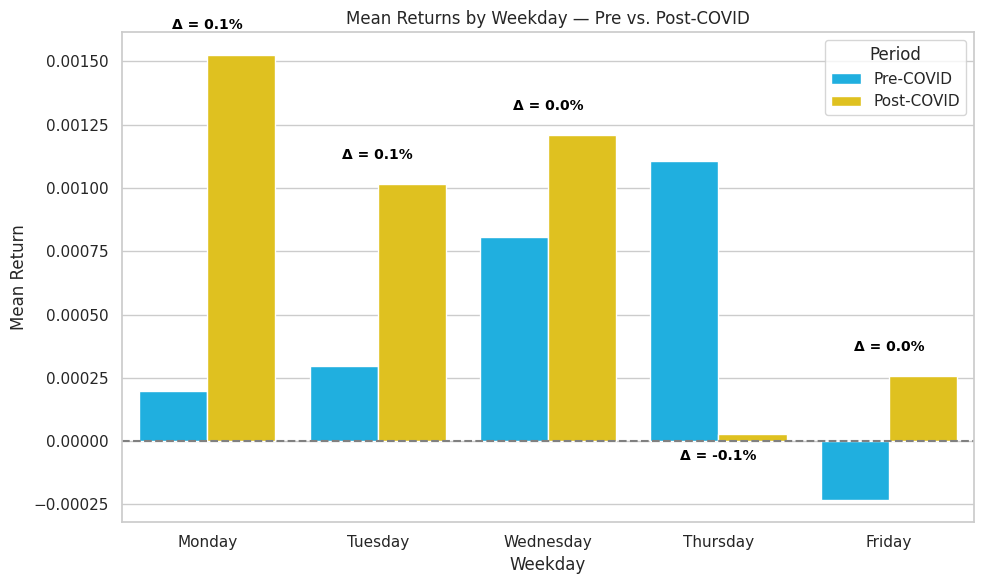

In [ ]:
# 3. Average Returns by Weekday (Pre vs. Post-COVID)

# Define the desired weekday order.
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(10, 6))
# Define a custom bright palette.
palette = {"Pre-COVID": "deepskyblue", "Post-COVID": "gold"}

ax = sns.barplot(data=qqq_prices,
                 x='WEEKDAY',
                 y='RETURNS',
                 hue='Period',
                 order=weekday_order,
                 errorbar=None,
                 palette=palette)
plt.title("Mean Returns by Weekday — Pre vs. Post-COVID")
plt.xlabel("Weekday")
plt.ylabel("Mean Return")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Period")

# Compute a pivot table of the average returns by weekday for annotation.
avg_weekday = qqq_prices.groupby(['WEEKDAY', 'Period'])['RETURNS'].mean().unstack()

# Reorder the pivot table using the desired weekday order.
avg_weekday = avg_weekday.reindex(weekday_order)

# Get the x positions of each weekday group from the plot.
x_positions = ax.get_xticks()

# Loop over each weekday to annotate the difference between periods.
for i, day in enumerate(weekday_order):
    if day in avg_weekday.index:
        # Extract the average returns for Pre-COVID and Post-COVID.
        pre_val = avg_weekday.loc[day, 'Pre-COVID']
        post_val = avg_weekday.loc[day, 'Post-COVID']

        # In case one of the values is missing, set it to 0.
        if pd.isna(pre_val):
            pre_val = 0.0
        if pd.isna(post_val):
            post_val = 0.0

        # Calculate the difference.
        diff = post_val - pre_val
        label_text = f"Δ = {diff*100:.1f}%"

        # Set vertical position: above the higher bar if diff >= 0, otherwise below the lower bar.
        if diff >= 0:
            y = max(pre_val, post_val) + 0.0001
        else:
            y = min(pre_val, post_val) - 0.0001

        # Annotate at the center of the group.
        ax.text(x_positions[i], y, label_text, ha="center", fontsize=10, color='black', fontweight='bold')
    else:
        print(f"No data available for {day}")

plt.tight_layout()
plt.show()


###Purpose:
To examine and compare the average returns on each weekday between the two periods.

###Key Insights:

This chart helps us observe if any particular weekday exhibits a pronounced anomaly (e.g., the well-documented “Monday effect”).

Differences between Pre‑COVID and Post‑COVID on specific weekdays can reveal shifts in trading activity or market sentiment.

###Interpretation:

For example, if the Post‑COVID period shows lower returns on Mondays relative to Pre‑COVID, it might indicate a change in investor behavior or liquidity patterns on that day.

###Takeaway:
The day-of-week analysis enhances our understanding by providing an additional layer to market efficiency and behavioral patterns.

## Volatility (Standard Deviation) by T‑Index

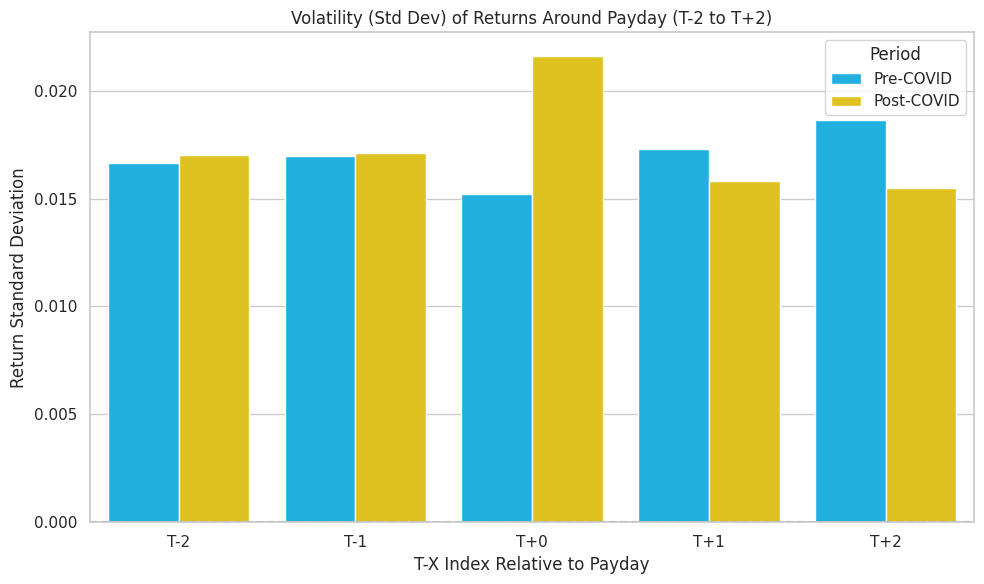

In [ ]:
# Volatility (Standard Deviation) by T-Index
plt.figure(figsize=(10, 6))
sns.barplot(
    data=t_data,
    x='T_Index',
    y='RETURNS',
    hue='Period',
    estimator=np.std,  # Using standard deviation as the estimator
    order=['T-2','T-1','T+0','T+1','T+2'],
    errorbar=None,
    palette=palette
)
plt.title("Volatility (Std Dev) of Returns Around Payday (T-2 to T+2)")
plt.xlabel("T-X Index Relative to Payday")
plt.ylabel("Return Standard Deviation")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


###Purpose:
To assess the risk or uncertainty of returns by computing the standard deviation for each T‑index group.

##Key Insights:

The chart shows how volatile returns are on different days around payday.

Comparing Pre‑COVID and Post‑COVID volatility provides insight into whether market risk around payday has increased or decreased.

###Interpretation:

A higher volatility on, say, T+0 in the Post‑COVID period indicates greater uncertainty in returns on payday.

###Takeaway:
This visualization is crucial for risk assessment. Even if returns are attractive, high volatility signals greater risk—information that is vital for both investors and strategists.



## Additional Visualization 2: Cumulative Return Over Time

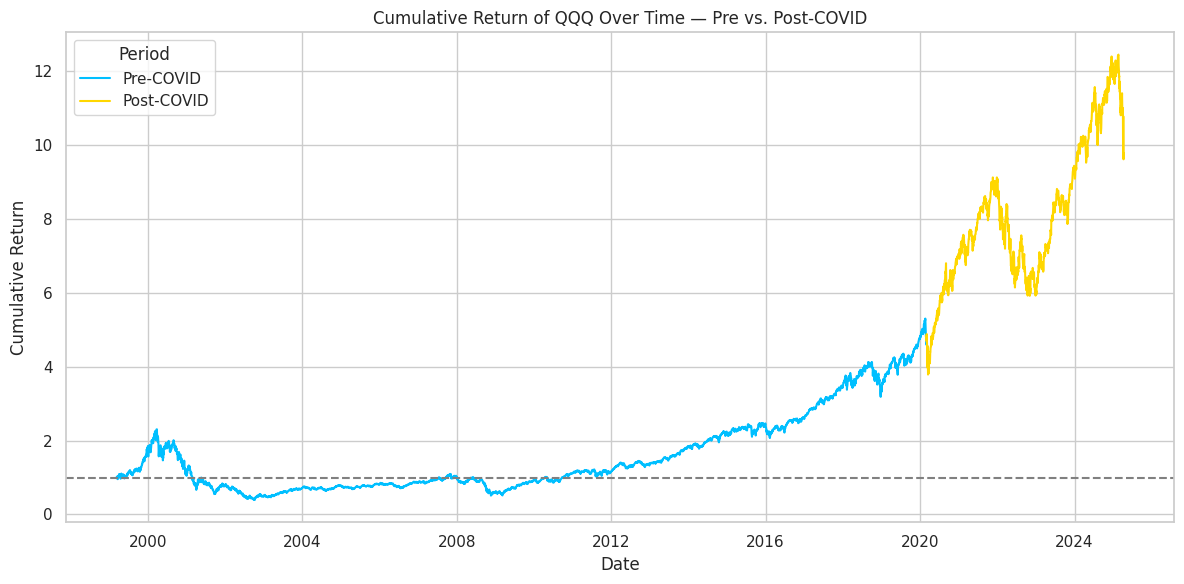

In [ ]:
# Cumulative Return Over Time
# Calculate cumulative returns using 1 + RETURNS
qqq_prices['Cumulative_Return'] = (1 + qqq_prices['RETURNS'].fillna(0)).cumprod()

plt.figure(figsize=(12, 6))
sns.lineplot(data=qqq_prices, x='Date', y='Cumulative_Return', hue='Period', palette=palette)
plt.title("Cumulative Return of QQQ Over Time — Pre vs. Post-COVID")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.axhline(1, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


###Purpose:
This line chart illustrates how the returns compound over time, distinguishing between the Pre‑COVID and Post‑COVID periods.

###Key Insights:

Long-term trends are visible, showing how small daily differences accumulate into a significant divergence in overall performance.

Any divergence between the two periods can indicate the long-term effect of behavioral or liquidity shifts in the market.

###Interpretation:

If the Post‑COVID cumulative return curve is notably different from the Pre‑COVID curve, it suggests that the structural changes in the market have altered long-term performance.

###Takeaway:
This chart underscores that while short-term anomalies exist, long-term market forces drive overall returns. It integrates the impact of the payday anomaly into the broader context of investment performance.